In [1]:
pip install matplotlib

In [2]:
pip install seaborn

In [3]:
pip install pandas

In [4]:
pip install scikit-learn

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
df=pd.read_csv('/content/healthcare_dataset.csv')

In [7]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [8]:
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [9]:
numerics=df.select_dtypes(include='number')

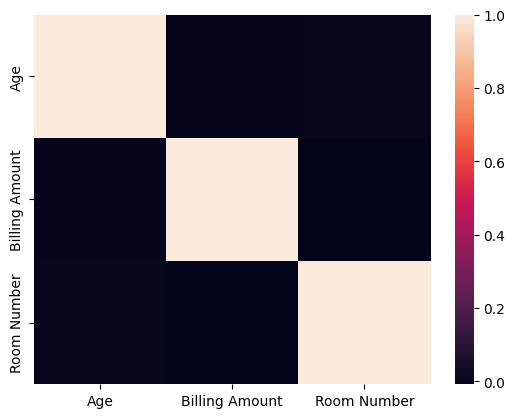

In [10]:
sns.heatmap(numerics.corr())
plt.show()

In [11]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [12]:
x=numerics.drop(columns=['Billing Amount'])
y=numerics['Billing Amount']

In [13]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y,random_state=42)

In [14]:
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [15]:
ypred=model.predict(xtest)
comparision = pd.DataFrame({'actual':ytest,'Predicted':ypred})
print(comparision)

             actual     Predicted
2501   34468.359637  25697.092479
21250  47835.217744  25906.425048
20024  33781.568283  25613.642346
26823  11298.789035  25552.358241
18209   6164.758130  26021.169642
...             ...           ...
3105   32757.841511  25991.093427
20188  17096.531627  25412.988042
25784  28084.583659  25840.770069
26628  35513.630143  25536.728325
17635   6445.853442  25792.817902

[6927 rows x 2 columns]


In [16]:
from sklearn.metrics import mean_squared_error, r2_score


In [17]:
r2 = r2_score(ytest, ypred)
print(r2)

-0.0007903185371240795


In [18]:
df['Admission Type'].value_counts()

,count
Admission Type,
Elective,9407
Urgent,9326
Emergency,8974


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()
df['Admission Type1']=le.fit_transform(df['Admission Type'])

In [21]:
df['Admission Type1'].head()

,Admission Type1
0,2
1,1
2,1
3,0
4,2


In [22]:
le.classes_

array(['Elective', 'Emergency', 'Urgent'], dtype=object)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
df.select_dtypes(include='object').columns

Index(['Name', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Admission Type', 'Discharge Date', 'Medication', 'Test Results'],
      dtype='object')

In [31]:
dfclean = df.drop(['Billing Amount', 'Name', 'Doctor', 'Hospital', 'Discharge Date',
                    'Date of Admission', 'Room Number', 'Admission Type','Admission Type1'], axis=1)
x=pd.get_dummies(dfclean, drop_first=True)
y=df['Admission Type1']

In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42)
model=LogisticRegression()
model.fit(xtrain,ytrain)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
ypred=model.predict(xtest)
comparision = pd.DataFrame({'actual':ytest,'Predicted':ypred})
print(comparision)

       actual  Predicted
2501        1          2
21250       2          2
20024       0          1
26823       2          2
18209       2          2
...       ...        ...
3105        2          0
20188       2          2
25784       1          2
26628       2          2
17635       1          2

[6927 rows x 2 columns]


In [37]:
r2 = r2_score(ytest, ypred)
print(r2)

-1.3699317496580408


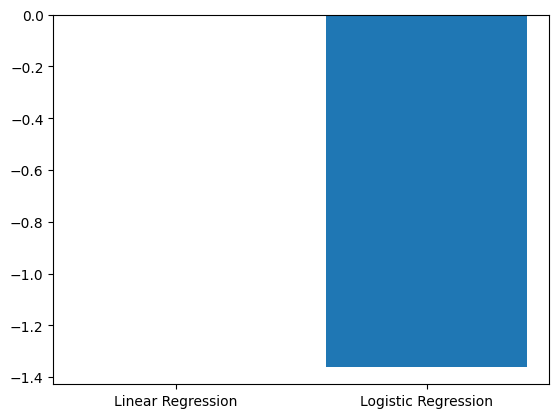

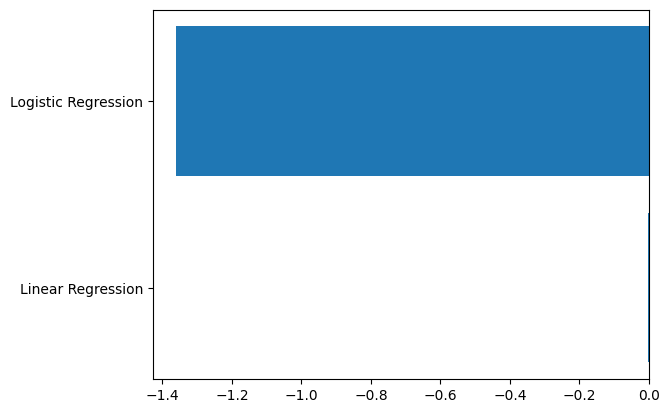

In [40]:
r2scores=[-0.0007,-1.36]
models=['Linear Regression','Logistic Regression']
plt.bar(models,r2scores)
plt.show()
plt.barh(models,r2scores)
plt.show()